In [1]:
from MultiTrackingSystem import MultiTrackingSystem
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [91]:
def show_detected_traj(obj):
    plt.figure(figsize=(10,5))
    detected_centers = np.concatenate([obj.detected_centers[i].reshape(1,-1) for i in range(len(obj.detected_centers)) if type(obj.detected_centers[i]) != int])
    estimated_centers = np.concatenate([obj.estimated_centers[i].reshape(1,-1) for i in range(len(obj.estimated_centers))])
    detected_point_clouds = np.concatenate([obj.point_clouds[i] for i in range(len(obj.detected_centers)) if type(obj.detected_centers[i]     ) != int])
    detected_box = [obj.bounding_boxes[i] for i in range(len(obj.detected_centers)) if type(obj.detected_centers[i]) != int]
    plt.plot(estimated_centers[:,0],estimated_centers[:,1],marker = 'o',label = 'Est')
    plt.plot(detected_centers[:,0],detected_centers[:,1], marker = 'x', label = 'Mea')
    plt.legend(fontsize = 20)
    # plt.scatter(detected_point_clouds[:,0],detected_point_clouds[:,1],s = 3)
    # for i in range(len(detected_box)):
    #     plt.plot(detected_box[i][:,0],detected_box[i][:,1],c = 'r',alpha = 0.3) # box
    #     plt.plot(detected_box[i][[0,-1],0],detected_box[i][[0,-1],1],c = 'r',alpha = 0.3)
    plt.show()

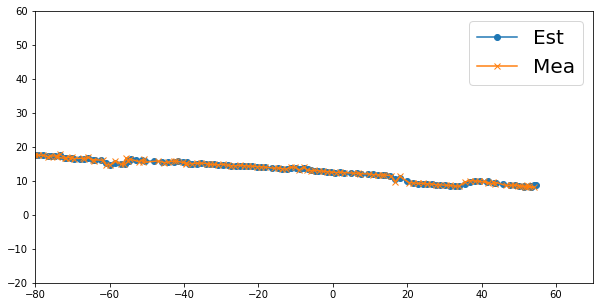

In [92]:
obj = multi_tracking.out_of_tracking_list[57]
show_detected_traj(obj)

In [2]:

from matplotlib import cm
from sklearn.cluster import DBSCAN
from LidarDBSCAN import AdaptiveDBSCAN

In [3]:
alpha = np.pi * (0.2)/180
beta = 12
corr = np.sin(alpha/2) * 2
min_sample_1 = 19657
min_sample_2 = -2.138
min_sample_3 = -100

In [ ]:
os.chdir(r'/Users/czhui960/Documents/Lidar/to ZHIHUI/US 395')
frame_path = r'/Users/czhui960/Documents/Lidar/to ZHIHUI/US 395/frames/2019-8-27-7-0-0-BF1(0-18000frames)/'
frame_names = os.listdir(frame_path)
frame_names.sort(key = lambda x : x.split(' ')[2][:-5])
frame_file_paths = [os.path.join(frame_path,frame_names[i]) for i in range(len(frame_names))]
multi_tracking = MultiTrackingSystem(2400, tolerance= 4,gen_fig= True)
multi_tracking.fit_adbgen(frame_file_paths,beta,min_sample_1,min_sample_2,min_sample_3)
multi_tracking.batch_tracking()
multi_tracking.svae_gif('US')

In [ ]:
os.chdir(r'/Users/czhui960/Documents/Lidar/to ZHIHUI/Texas median')
frame_path = r'/Users/czhui960/Documents/Lidar/to ZHIHUI/Texas median/2019-6-17-10-0-0-BF1(0-18000frames)/'
frame_names = os.listdir(frame_path)
frame_names.sort(key = lambda x : x.split(' ')[2][:-5])
frame_file_paths = [os.path.join(frame_path,frame_names[i]) for i in range(len(frame_names))]
multi_tracking = MultiTrackingSystem(2400, tolerance= 4,gen_fig= True)
multi_tracking.fit_adbgen(frame_file_paths,beta,min_sample_1,min_sample_2,min_sample_3)
multi_tracking.batch_tracking()
multi_tracking.svae_gif('Taxes')

In [5]:
os.chdir(r'/Users/czhui960/Documents/Lidar/to ZHIHUI/US 395')
frame_path = r'/Users/czhui960/Documents/Lidar/to ZHIHUI/US 395/frames/2019-8-27-7-0-0-BF1(0-18000frames)/'
frame_names = os.listdir(frame_path)
frame_names.sort(key = lambda x : x.split(' ')[2][:-5])
frame_file_paths = [os.path.join(frame_path,frame_names[i]) for i in range(len(frame_names))]

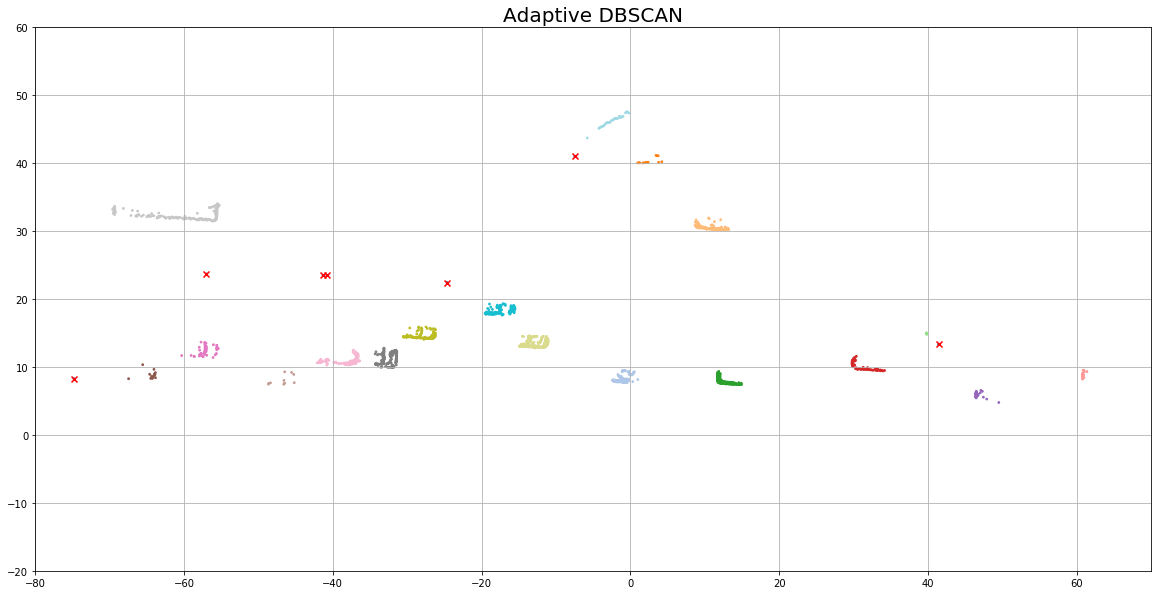

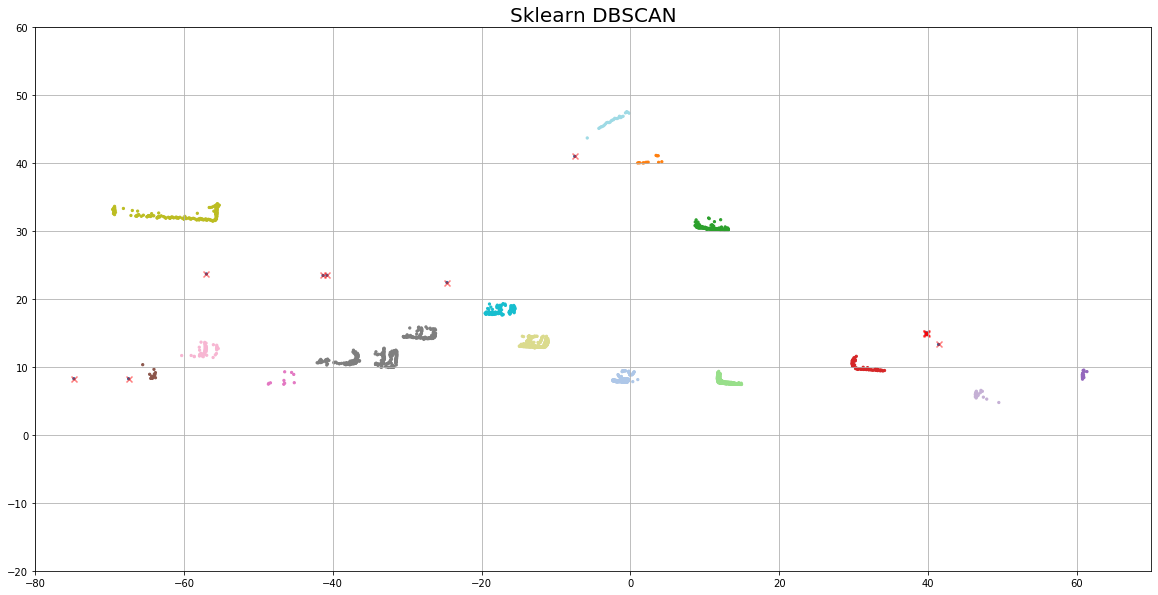

In [6]:
point_cloud = np.array(pd.read_csv(frame_file_paths[1]).loc[:,['X','Y','distance_m']])
x_lim = [-80, 70]
y_lim = [-20, 60]
alpha = np.pi * (0.2)/180
beta = 13
corr = np.sin(alpha/2) * 2
min_sample_1 = 19657
min_sample_2 = -2.138
min_sample_3 = 0
labels = AdaptiveDBSCAN(beta,min_sample_1,min_sample_2,min_sample_3,delta=0.05,c_min=True).fit_predict(point_cloud)
plt.figure(figsize=(20,int(20*((y_lim[1]-y_lim[0])/(x_lim[1]-x_lim[0])))))
plt.scatter(point_cloud[:,0],point_cloud[:,1],c = labels,s = 3, cmap = cm.tab20)
plt.scatter(point_cloud[:,0][labels==-1],point_cloud[:,1][labels==-1],c = 'r', marker='x')
plt.xlim(x_lim)
plt.ylim(y_lim)
plt.title(r'Adaptive DBSCAN',fontsize = 20)
plt.grid()
plt.show()
label = DBSCAN(eps=3,min_samples=10).fit_predict(X = point_cloud)
plt.figure(figsize=(20,int(20*((y_lim[1]-y_lim[0])/(x_lim[1]-x_lim[0])))))
plt.scatter(point_cloud[:,0],point_cloud[:,1],c = label,s = 5, cmap = cm.tab20)
plt.scatter(point_cloud[:,0][label==-1],point_cloud[:,1][label==-1],c = 'r', marker='x',alpha = 0.5)
plt.title(r'Sklearn DBSCAN',fontsize = 20)
plt.xlim(x_lim)
plt.ylim(y_lim)
plt.grid()
plt.show()

